# UK COVID-19 Trends: Admissions, Hospitalizations, Vaccinations, and Ventilation Beds


### Introduction 

Coronavirus disease 2019 (COVID-19) is a virus caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in Wuhan, China, in 2019. Typical symptoms associated with the virus include fever, cough, headache, breathing difficulties, and loss of smell and taste. The symptoms of the disease usually become noticeable after an incubation period that ranges between 2 to 14 days, with the median time being around 4-5 days after exposure (Who.int, 2023).

The transmission of the virus primarily occurs through respiratory droplets and aerosols produced when an infected person coughs, sneezes, talks, or breathes. The risk of contamination significantly increases with the closeness of proximity between infected and uninfected individuals, especially in poorly ventilated and crowded spaces.

Mechanical ventilation beds have been a contentious issue for the UK government during the pre-pandemic and post-pandemic periods. The underlying argument stems from a comparative study between leading European nations, such as Germany and France, regarding the availability of mechanical ventilation beds per 1,000 patients. According to data from the King's Fund , the UK has 2.43 beds per 1,000 population. France and Germany boast 5.73 and 7.82 beds per 1,000 population, respectively (The King’s Fund, 2023).

This disparity in the availability of mechanical ventilation beds has led to concerns about the UK's preparedness and ability to handle a surge in COVID-19 cases, especially during the pandemic's peak. It has highlighted the importance of investing in healthcare infrastructure and resources to ensure countries are better equipped to manage future health crises.

With the datasets provided to me by Dr. Harry Yu, an attempt will be made to illustrate trends and correlated trends between three datasets - these being patient new admission, patients in hospital and vaccinations daily. Understanding the relationship between these factors is essential to make informed decisions regarding healthcare resource allocation, vaccination strategies, and public health policies.

In [50]:
# All the necessary libraries are imported here
import pandas as pd
import numpy as np
# mdates
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from prophet import Prophet
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.ensemble import IsolationForest
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.dates import DateFormatter
import pandas as pd


#### EDA (Exploratory data analysis)

In [51]:
# read data
df_deaths = pd.read_csv('Deaths.csv')

# drop duplicates
df_deaths = df_deaths.drop_duplicates()

# If there are duplicates print them
if df_deaths.duplicated().any():
    print("There are duplicates:")
    print(df_deaths[df_deaths.duplicated()])
else:
    print("There are no duplicates:")


# Check for missing values
if df_deaths.isnull().values.any():
    print("There are missing values:")
    print(df_deaths[df_deaths.isnull().any(axis=1)])
    # Drop missing values
    df_deaths = df_deaths.dropna()
df_deaths.tail()


There are no duplicates:
There are missing values:
           areaName       date  newDeaths28DaysByDeathDate  \
374  United Kingdom   1/3/2020                           0   
375  United Kingdom  29/2/2020                           0   

     cumDeaths28DaysByDeathDate  
374                         NaN  
375                         NaN  


,areaName,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
369,United Kingdom,6/3/2020,0,6.0
370,United Kingdom,5/3/2020,3,6.0
371,United Kingdom,4/3/2020,0,3.0
372,United Kingdom,3/3/2020,2,3.0
373,United Kingdom,2/3/2020,1,1.0


In [52]:

# read data
df_addmissions = pd.read_csv('PatientNewAdmissions.csv')

# drop duplicates
df_addmissions = df_addmissions.drop_duplicates()

# If there are duplicates print them
if df_addmissions.duplicated().any():
    print("There are duplicates:")
    print(df_addmissions[df_addmissions.duplicated()])
else:
    print("There are no duplicates:")


# Check for missing values
if df_addmissions.isnull().values.any():
    print("There are missing values:")
    print(df_addmissions[df_addmissions.isnull().any(axis=1)])
    # Drop missing values
    df_addmissions = df_addmissions.dropna()
df_addmissions.head()

# Description of the data
df_addmissions.describe()


There are no duplicates:


,newAdmissions
count,317.000000
mean,1268.785489
std,1141.522511
min,72.000000
25%,263.000000
50%,983.000000
75%,1782.000000
max,4576.000000


In [53]:
# read data
df_vaccinations = pd.read_csv('VaccinationsDaily.csv')

# drop duplicates
df_vaccinations = df_vaccinations.drop_duplicates()

# If there are duplicates print them
if df_vaccinations.duplicated().any():
    print("There are duplicates:")
    print(df_vaccinations[df_vaccinations.duplicated()])
else:
    print("There are no duplicates:")


# Check for missing values
if df_vaccinations.isnull().values.any():
    print("There are missing values:")
    print(df_vaccinations[df_vaccinations.isnull().any(axis=1)])
    # Drop missing values
    df_vaccinations = df_vaccinations.dropna()
# Check the last 5 rows
df_vaccinations.tail()

# Split


There are no duplicates:
There are missing values:
          areaName       date  newPeopleVaccinatedFirstDoseByPublishDate  \
96  United Kingdom  10/1/2021                                        NaN   

    newPeopleVaccinatedSecondDoseByPublishDate  \
96                                         NaN   

    cumPeopleVaccinatedFirstDoseByPublishDate  \
96                                    2286572   

    cumPeopleVaccinatedSecondDoseByPublishDate  
96                                      391399  


,areaName,date,newPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
91,United Kingdom,15/1/2021,341317.0,4208.0,3576263,447442
92,United Kingdom,14/1/2021,316694.0,5257.0,3234946,443234
93,United Kingdom,13/1/2021,278943.0,9745.0,2918252,437977
94,United Kingdom,12/1/2021,207661.0,16065.0,2639309,428232
95,United Kingdom,11/1/2021,145076.0,20768.0,2431648,412167


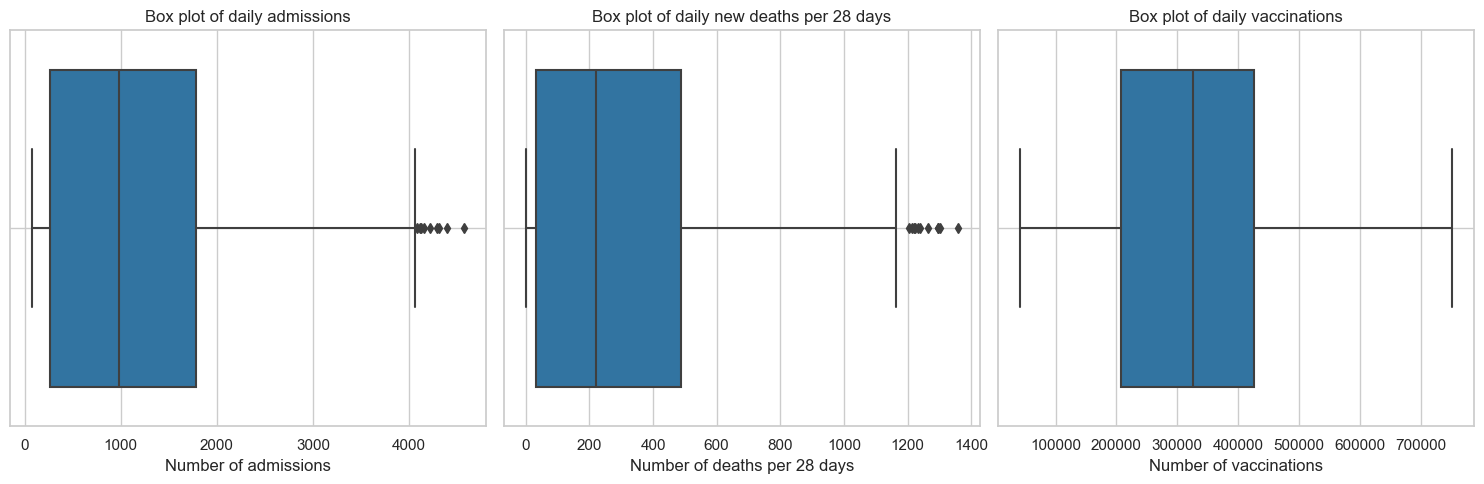

In [54]:

# Set style
sns.set_style('whitegrid')
sns.set_palette('tab10')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot of daily admissions
sns.boxplot(x=df_addmissions['newAdmissions'], ax=axes[0])
axes[0].set_title('Box plot of daily admissions')
axes[0].set_xlabel('Number of admissions')
# grid true
axes[0].grid(True)

# Box plot of daily new deaths per 28 days
sns.boxplot(x=df_deaths['newDeaths28DaysByDeathDate'], ax=axes[1])
axes[1].set_title('Box plot of daily new deaths per 28 days')
axes[1].set_xlabel('Number of deaths per 28 days')
# grid true
axes[1].grid(True)

# Box plot of daily vaccinations
sns.boxplot(x=df_vaccinations['newPeopleVaccinatedFirstDoseByPublishDate'], ax=axes[2])
axes[2].set_title('Box plot of daily vaccinations')
axes[2].set_xlabel('Number of vaccinations')
# grid true
axes[2].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

Some preprocessing is necessary for us to visually display the data. This process involves removing duplicates to prevent distortion of the analysis and potential misinterpretations. Both Deaths.csv and VaccinationsDaily.csv contained NaN values, which were eliminated to enhance the normalization of the dataset.

Further adjustments, such as reversing the data sets for plotting, are required. Conditionals were employed to verify the integrity of the dataset while executing the code. Alerts regarding missing values and duplicates were displayed on the screen, along with comments specifying whether duplicates or missing values had been removed.

The aforementioned box plots offer a visual representation of the skewness in the datasets. Each plot reveals a right-skewed distribution, which may be attributed to various social factors. For instance, the initial COVID-19 outbreak may have skewed the Deaths.csv data, while the availability of new vaccines and the easing of lockdown measures may have impacted the Admissions.csv data. These factors will be further examined within this notebook.

In [55]:
# Read the CSV data into a pandas DataFrame
data = df_vaccinations

C:\Users\steve\AppData\Local\Temp\ipykernel_24588\142822038.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\steve\AppData\Local\Temp\ipykernel_24588\142822038.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
C:\Users\steve\AppData\Local\Temp\ipykernel_24588\142822038.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


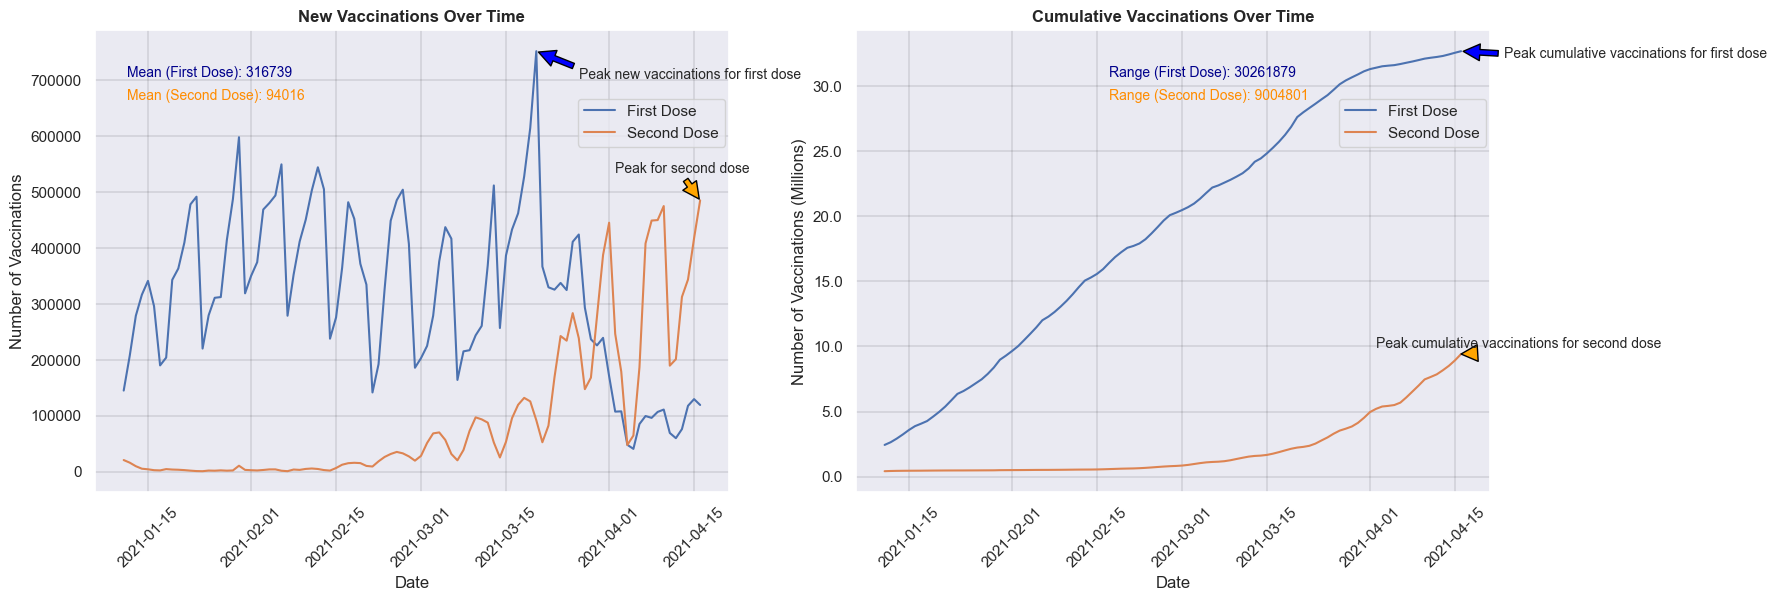

,newPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
count,96.000000,96.000000,9.600000e+01,9.600000e+01
mean,316739.114583,94016.343750,1.928942e+07,2.090264e+06
std,149417.044229,132985.115941,9.736546e+06,2.401502e+06
min,40744.000000,818.000000,2.431648e+06,4.121670e+05
25%,206764.750000,4057.000000,1.085091e+07,5.049840e+05
50%,325296.000000,27802.000000,2.018250e+07,8.059740e+05
75%,426555.750000,127297.750000,2.873794e+07,2.593500e+06
max,752308.000000,485421.000000,3.269353e+07,9.416968e+06


In [56]:
# Convert date column to pandas datetime format
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Set the style and context for the seaborn plots
sns.set(style='darkgrid', context='notebook')
sns.set_style("dark")

# Calculate mean and range for new and cumulative vaccinations
new_first_mean = data['newPeopleVaccinatedFirstDoseByPublishDate'].mean()
new_second_mean = data['newPeopleVaccinatedSecondDoseByPublishDate'].mean()
cum_first_range = data['cumPeopleVaccinatedFirstDoseByPublishDate'].max() - data['cumPeopleVaccinatedFirstDoseByPublishDate'].min()
cum_second_range = data['cumPeopleVaccinatedSecondDoseByPublishDate'].max() - data['cumPeopleVaccinatedSecondDoseByPublishDate'].min()

# Create subplots for new and cumulative vaccinations
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create line plots for new vaccinations
sns.lineplot(data=data, x='date', y='newPeopleVaccinatedFirstDoseByPublishDate', label='First Dose', ax=ax1)
sns.lineplot(data=data, x='date', y='newPeopleVaccinatedSecondDoseByPublishDate', label='Second Dose', ax=ax1)
# Struggling for a title name haha
ax1.set_title('New Vaccinations Over Time', fontweight='bold')
# Grid lines for the plot
ax1.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
ax1.set_ylabel('Number of Vaccinations')
ax1.set_xlabel('Date')
# Rotate the x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


# Move the legend outside of the plot to the right side
ax1.legend(loc='center left', bbox_to_anchor=(0.75, 0.8))

# Add EDA annotations for new vaccinations
ax1.annotate(f'Mean (First Dose): {new_first_mean:.0f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='darkblue')
ax1.annotate(f'Mean (Second Dose): {new_second_mean:.0f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='darkorange')

# Find the date with the maximum new vaccinations for first dose
max_first_dose = data.loc[data['newPeopleVaccinatedFirstDoseByPublishDate'].idxmax(), 'date']

# Add annotation for the date with the maximum new vaccinations for first dose
ax1.annotate('Peak new vaccinations for first dose', xy=(max_first_dose, data['newPeopleVaccinatedFirstDoseByPublishDate'].max()), 
             xytext=(max_first_dose + pd.Timedelta(days=7), data['newPeopleVaccinatedFirstDoseByPublishDate'].max() - 50000), 
             fontsize=10, arrowprops=dict(facecolor='blue', edgecolor='black', shrink=0.05))

# Find the date with the maximum new vaccinations for second dose
max_second_dose = data.loc[data['newPeopleVaccinatedSecondDoseByPublishDate'].idxmax(), 'date']
# Add annotation for the date with the maximum new vaccinations for second dose
ax1.annotate('Peak for second dose', xy=(max_second_dose, data['newPeopleVaccinatedSecondDoseByPublishDate'].max()),
             xytext=(max_second_dose - pd.Timedelta(days=14), data['newPeopleVaccinatedSecondDoseByPublishDate'].max() + 50000),
             fontsize=10, arrowprops=dict(facecolor='orange', edgecolor='black', shrink=0.05))

# Create line plots for cumulative vaccinations
sns.lineplot(data=data, x='date', y='cumPeopleVaccinatedFirstDoseByPublishDate', label='First Dose', ax=ax2)
sns.lineplot(data=data, x='date', y='cumPeopleVaccinatedSecondDoseByPublishDate', label='Second Dose', ax=ax2)
# Add black grid lines
ax2.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_title('Cumulative Vaccinations Over Time', fontweight='bold')
ax2.set_ylabel('Number of Vaccinations (Millions)')
ax2.set_xlabel('Date')
# Line underneath each plot title
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


# Find the date with the maximum cumulative vaccinations for first dose
max_cum_first_dose = data.loc[data['cumPeopleVaccinatedFirstDoseByPublishDate'].idxmax(), 'date']

# Add annotation for the date with the maximum cumulative vaccinations for first dose
ax2.annotate('Peak cumulative vaccinations for first dose', xy=(max_cum_first_dose, data['cumPeopleVaccinatedFirstDoseByPublishDate'].max()),
                xytext=(max_cum_first_dose + pd.Timedelta(days=7), data['cumPeopleVaccinatedFirstDoseByPublishDate'].max() - 500000),
                fontsize=10, arrowprops=dict(facecolor='blue', edgecolor = 'black', shrink=0.05))

# Find the date with the maximum cumulative vaccinations for second dose
max_cum_second_dose = data.loc[data['cumPeopleVaccinatedSecondDoseByPublishDate'].idxmax(), 'date']

# Find the date with the maximum cumulative vaccinations for second dose
max_cum_second_dose = data['date'][data['cumPeopleVaccinatedSecondDoseByPublishDate'].idxmax()]

# Add annotation for the date with the maximum cumulative vaccinations for second dose
ax2.annotate('Peak cumulative vaccinations for second dose', 
             xy=(max_cum_second_dose, data['cumPeopleVaccinatedSecondDoseByPublishDate'].max()),
             xytext=(max_cum_second_dose - pd.Timedelta(days=14), data['cumPeopleVaccinatedSecondDoseByPublishDate'].max() + 500000),
             fontsize=10, arrowprops=dict(facecolor='orange', edgecolor='black', shrink=0.05))


#Rotate the x-axis labels
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Legend on the top left
ax2.legend(loc='center left', bbox_to_anchor=(0.75, 0.8))


#Format the y-axis to display millions. Seems odd if I don't do this 4/12/2023
ticks_loc = ax2.get_yticks().tolist()
ax2.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax2.set_yticklabels(['{:.1f}'.format(x/1000000) for x in ticks_loc])

#Add EDA annotations for cumulative vaccinations
ax2.annotate(f'Range (First Dose): {cum_first_range:.0f}', xy=(0.4, 0.9), xycoords='axes fraction', fontsize=10, color='darkblue')
ax2.annotate(f'Range (Second Dose): {cum_second_range:.0f}', xy=(0.4, 0.85), xycoords='axes fraction', fontsize=10, color='darkorange')

plt.show()

# Describe the data
data.describe()


This dataset offers valuable insights into the effectiveness of the UK's vaccine rollout. For example, the mean average of 316,739 for the first dose reveals that a substantial portion of the population is participating in the rollout, and the government is supplying the necessary vaccines to help restore normalcy. While the dataset does not provide historical context regarding previous COVID-19 case surges, we can look to specific examples to understand the impact of government policies. For instance, during the first wave in March and April 2020, the UK implemented strict lockdown measures which led to a decrease in cases. The easing of these measures in May 2020 resulted in a rise in cases, highlighting the influence of government actions on the pandemic's trajectory (The Health Foundation, 2020). The cumulative columns show that over a third of the population has received at least one vaccine dose, representing a positive step towards achieving herd immunity. To better comprehend the relationship between the vaccination rollout and its potential mitigating effect on the number of deaths, additional data will be needed. This aspect will be further explored in the upcoming code block.

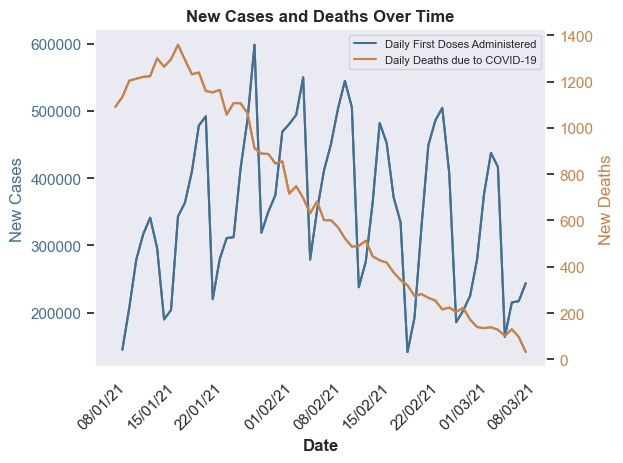

,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,newPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
count,60.000000,60.000000,59.000000,59.000000,6.000000e+01,6.000000e+01
mean,681.216667,112205.650000,351985.491525,16273.152542,1.273235e+07,6.241689e+05
std,425.297427,12235.705889,117484.321714,21221.208807,6.604194e+06,2.357476e+05
min,32.000000,85383.000000,141719.000000,818.000000,2.286572e+06,3.913990e+05
25%,272.000000,103543.000000,259921.500000,2690.000000,6.783388e+06,4.719540e+05
50%,616.000000,116330.500000,350348.000000,5257.000000,1.285239e+07,5.179725e+05
75%,1113.500000,122768.500000,451632.000000,20504.500000,1.835511e+07,6.770082e+05
max,1359.000000,125165.000000,598389.000000,97162.000000,2.305372e+07,1.351515e+06


In [57]:
# Read Deaths.csv
deaths = pd.read_csv('Deaths.csv')

# Convert date column to pandas datetime format
deaths['date'] = pd.to_datetime(deaths['date'], dayfirst=True)

# Read the datasets as DataFrames
df1 = pd.read_csv('Deaths.csv')
df2 = pd.read_csv('VaccinationsDaily.csv')
# Merge the datasets
merged_df = df1.merge(df2, on=['areaName', 'date'])

# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%d/%m/%Y')


# Use Seaborn to improve the visuals
sns.set(style='darkgrid', context='notebook')
sns.set_style("dark")


# Set the color palette with reduced saturation
my_palette = sns.color_palette('tab10', n_colors=2, desat=0.5)



# Plot the data
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('New Cases', color=my_palette[0])
ax1.plot(merged_df['date'], merged_df['newPeopleVaccinatedFirstDoseByPublishDate'], color=my_palette[0])
ax1.tick_params(axis='y', labelcolor=my_palette[0])

ax2 = ax1.twinx()
ax2.set_ylabel('New Deaths', color=my_palette[1])
ax2.plot(merged_df['date'], merged_df['newDeaths28DaysByDeathDate'], color=my_palette[1])
ax2.tick_params(axis='y', labelcolor=my_palette[1])

# Format the x-axis dates
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))

# Add a title
ax1.set_title('New Cases and Deaths Over Time', fontweight='bold')

# Add a legend
# Create handles and labels for each line
handles, labels = [], []
line1, = ax1.plot(merged_df['date'], merged_df['newPeopleVaccinatedFirstDoseByPublishDate'], color=my_palette[0])
handles.append(line1)
labels.append('Daily First Doses Administered')
line2, = ax2.plot(merged_df['date'], merged_df['newDeaths28DaysByDeathDate'], color=my_palette[1])
handles.append(line2)
labels.append('Daily Deaths due to COVID-19')

# Add a legend
ax1.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1), prop={'size': 8})

# Rotate x-axis ticks by 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, hspace=0.3)

# font size clearly
plt.rcParams.update({'font.size': 12})


fig.tight_layout()
plt.show()

# Describe the data
merged_df.describe()

The visualisation aims to demonstrate how the vaccine rollout has affected the number of deaths within 28 days. The data suggests that the vaccination efforts have been successful in reducing the overall number of deaths. However, it's worth noting that the spikes in fatalities may be due to the most vulnerable individuals succumbing to the disease, while the less vulnerable age groups contribute to the slower increase in deaths.

To provide a more comprehensive picture of the impact of vaccination efforts, it would be beneficial to track new patient admissions within hospitals, daily vaccinations, and the number of deaths. This information would enable us to identify any surges in severe illness, evaluate the progress in vaccinating the population, and assess the effectiveness of vaccination in preventing hospitalization and death. 

The next code block will attempt to do just that.

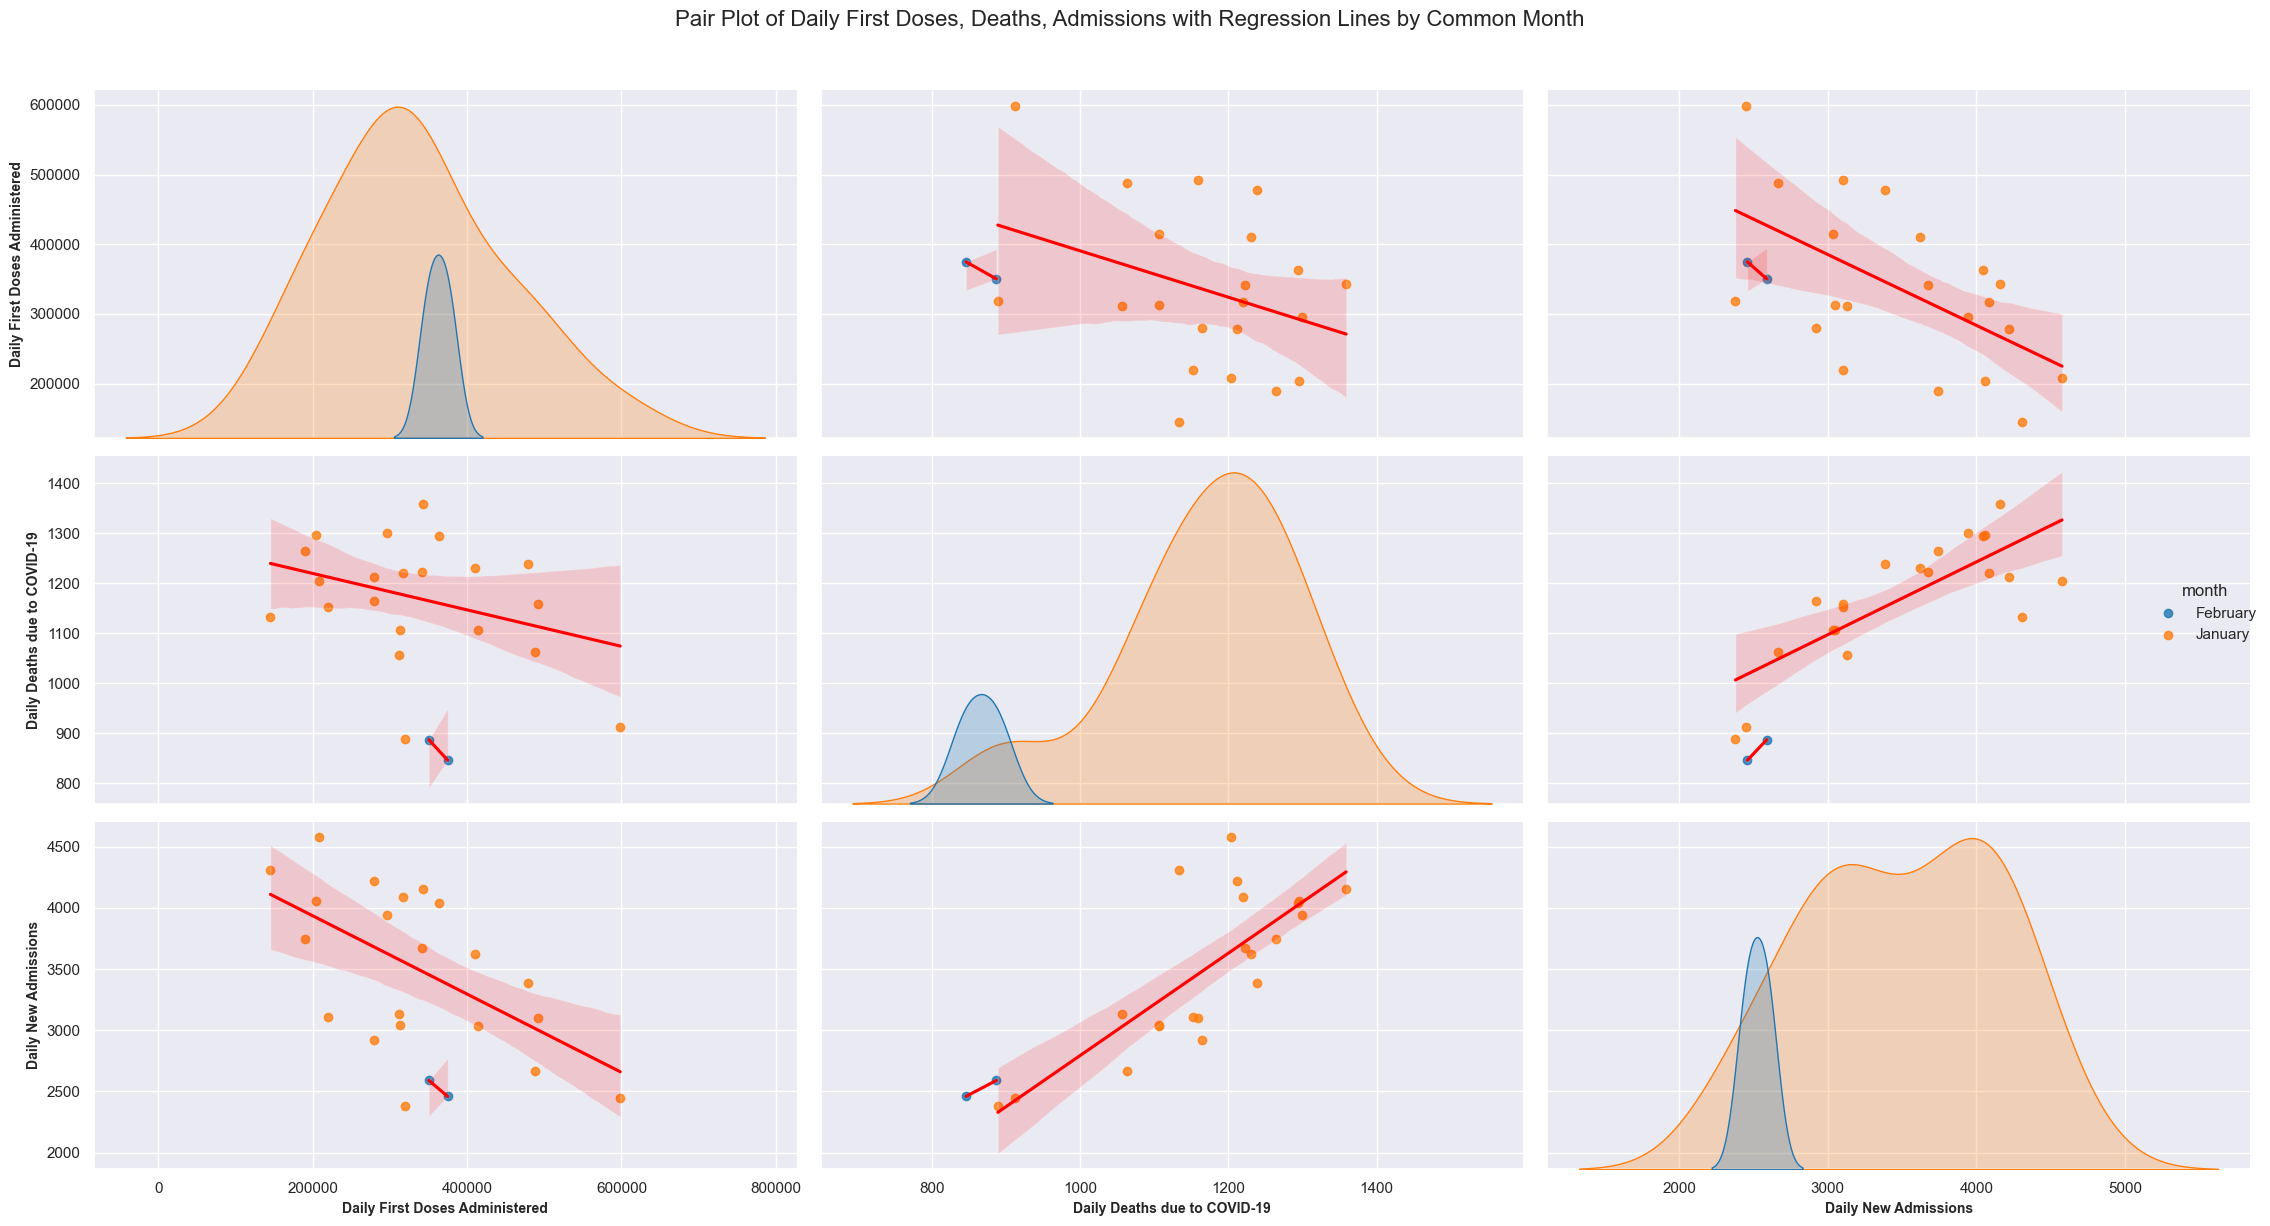

,newAdmissions,newPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
count,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000,23.000000
mean,3421.521739,336299.956522,4676.652174,5.933161e+06,464838.521739,1144.260870,99838.565217
std,676.354457,109843.653591,5009.466145,2.381461e+06,21924.345652,144.422114,7959.219650
min,2379.000000,145076.000000,818.000000,2.431648e+06,412167.000000,846.000000,86516.000000
25%,2977.500000,279350.000000,2067.000000,3.967448e+06,451181.500000,1084.500000,93307.000000
50%,3387.000000,319038.000000,2620.000000,5.861351e+06,468617.000000,1164.000000,100358.000000
75%,4049.500000,392305.500000,4386.500000,7.683974e+06,477369.500000,1235.000000,106551.000000
max,4576.000000,598389.000000,20768.000000,1.002147e+07,498962.000000,1359.000000,111701.000000


In [58]:
# Convert date columns to datetime data type
df_addmissions['date'] = pd.to_datetime(df_addmissions['date'], dayfirst=True)
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'], dayfirst=True)
df_deaths['date'] = pd.to_datetime(df_deaths['date'], dayfirst=True)

# Merge the data frames on the date column
merged_df = pd.merge(df_addmissions, df_vaccinations, on='date')
merged_df = pd.merge(merged_df, df_deaths, on='date')

# Extract the month from the date column for each data set
merged_df['month'] = merged_df['date'].dt.month_name()

# Identify the common months in all data sets
common_months = set(merged_df['month'])

# Filter the merged data frame to include only the common months
filtered_merged_df = merged_df[merged_df['month'].isin(common_months)]

# Dark grid style
sns.set_style('darkgrid')
sns.set_palette('tab10')

# Create a pair plot with regression lines and a custom figure size
# Create a pair plot with larger subplots
g = sns.pairplot(filtered_merged_df, vars=['newPeopleVaccinatedFirstDoseByPublishDate', 'newDeaths28DaysByDeathDate', 'newAdmissions'], hue='month', kind='reg', height=4, aspect=1.8, plot_kws={'line_kws':{'color':'red'}})


# Update the x and y labels with more descriptive names and smaller font sizes
for i, ax in enumerate(g.axes.flat):
    xlabel = ax.get_xlabel().replace('newPeopleVaccinatedFirstDoseByPublishDate', 'Daily First Doses Administered').replace('newDeaths28DaysByDeathDate', 'Daily Deaths due to COVID-19').replace('newAdmissions', 'Daily New Admissions')
    ylabel = ax.get_ylabel().replace('newPeopleVaccinatedFirstDoseByPublishDate', 'Daily First Doses Administered').replace('newDeaths28DaysByDeathDate', 'Daily Deaths due to COVID-19').replace('newAdmissions', 'Daily New Admissions')
    ax.set_xlabel(xlabel, fontsize=10) # Just messing around with the font size
    ax.set_ylabel(ylabel, fontsize=10)
    # Bold the x and y labels
    ax.xaxis.label.set_weight('bold')
    ax.yaxis.label.set_weight('bold')

# Add a title
plt.suptitle('Pair Plot of Daily First Doses, Deaths, Admissions with Regression Lines by Common Month', fontsize=16, y=1.02)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

# Describe the merged data frame
merged_df.describe()


A key observation is the negative correlation between daily new admissions and first doses administered. This reinforces the idea that the vaccination rollout has played a crucial role in reducing the number of patients in hospitals.

The vaccination rollout in the UK has evolved over time, with the introduction of new vaccines. Initially, the Pfizer-BioNTech vaccine was the only one available, but the situation changed when the AstraZeneca vaccine was introduced for public use on January 4th. This expansion in vaccine options provided the National Health Service (NHS) with additional resources to protect both the general population and essential healthcare workers (Institute for Government, 2021).

The pair plot and regression line used to analyze the relationship between these datasets offer valuable insights into the effectiveness of the vaccination program in controlling hospital admissions. The decreasing trend in new admissions as the number of first doses administered increases highlights the importance of continuing the vaccination campaign to further mitigate the strain on the healthcare system.


### Data mining

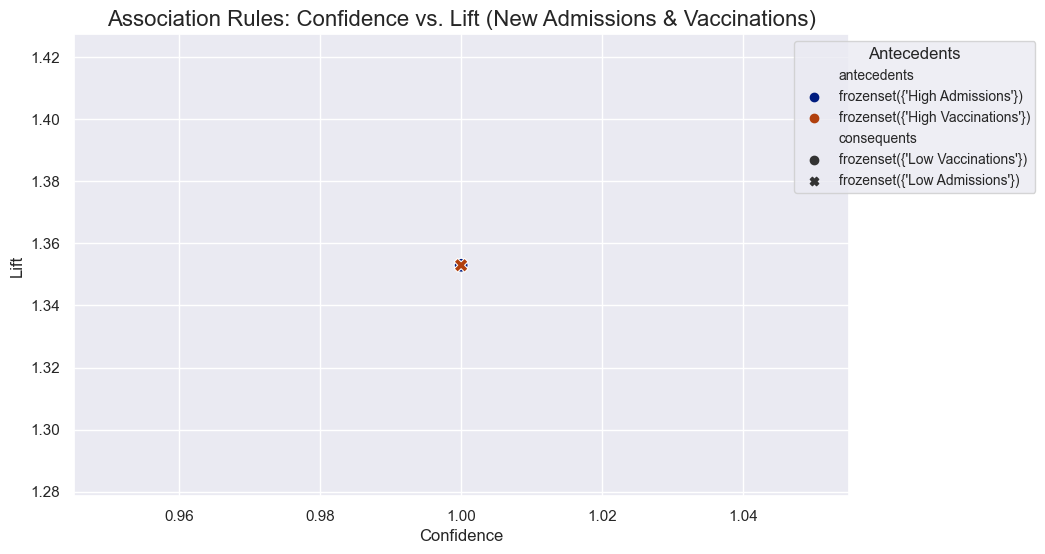

In [59]:
# Define thresholds for high values
high_vaccinations_threshold = filtered_merged_df['newPeopleVaccinatedFirstDoseByPublishDate'].quantile(0.75)
high_admissions_threshold = filtered_merged_df['newAdmissions'].quantile(0.75)

# Function to discretize the values into binary columns
def discretize(row):
    return [
        "High Vaccinations" if row["newPeopleVaccinatedFirstDoseByPublishDate"] > high_vaccinations_threshold else "Low Vaccinations",
        "High Admissions" if row["newAdmissions"] > high_admissions_threshold else "Low Admissions"
    ]

# Create a new DataFrame with binary columns for high values
binary_data = filtered_merged_df.apply(discretize, axis=1)
binary_data_list = binary_data.tolist()

# Apply the TransactionEncoder to transform the dataset
te = TransactionEncoder()
te_ary = te.fit(binary_data_list).transform(binary_data_list)
binary_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(binary_df, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules.sort_values(by="confidence", ascending=False, inplace=True)

# Scatter plot of confidence vs. lift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', hue='antecedents', style='consequents', s=100, palette='dark')

# Customize the plot
plt.title('Association Rules: Confidence vs. Lift (New Admissions & Vaccinations)', fontsize=16)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Lift', fontsize=12)
plt.legend(title="Antecedents", title_fontsize=12, loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10)

# Show the plot
plt.show()

The Apriori algorithm results indicate a strong inverse association between vaccination rates and hospital admissions, with both rules showing a confidence of 1.0 and a lift of approximately 1.35. This reinforces the idea that recent vaccination efforts have significantly contributed to reducing hospitalizations. As the vaccination coverage expands, governments can have increased confidence in easing lockdown measures, supported by these statistics. Consequently, a gradual return to normalcy is anticipated as a larger percentage of the population becomes immune, reducing the strain on healthcare systems and mitigating the risk of COVID-19 transmission.

c:\Users\steve\scoop\apps\python\current\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


         date  newAdmissions  newPeopleVaccinatedFirstDoseByPublishDate
3  2021-01-30           2447                                   598389.0
21 2021-01-12           4576                                   207661.0
22 2021-01-11           4307                                   145076.0
Number of anomalies: 3
January    3
Name: month, dtype: int64
3776.6666666666665
3421.521739130435


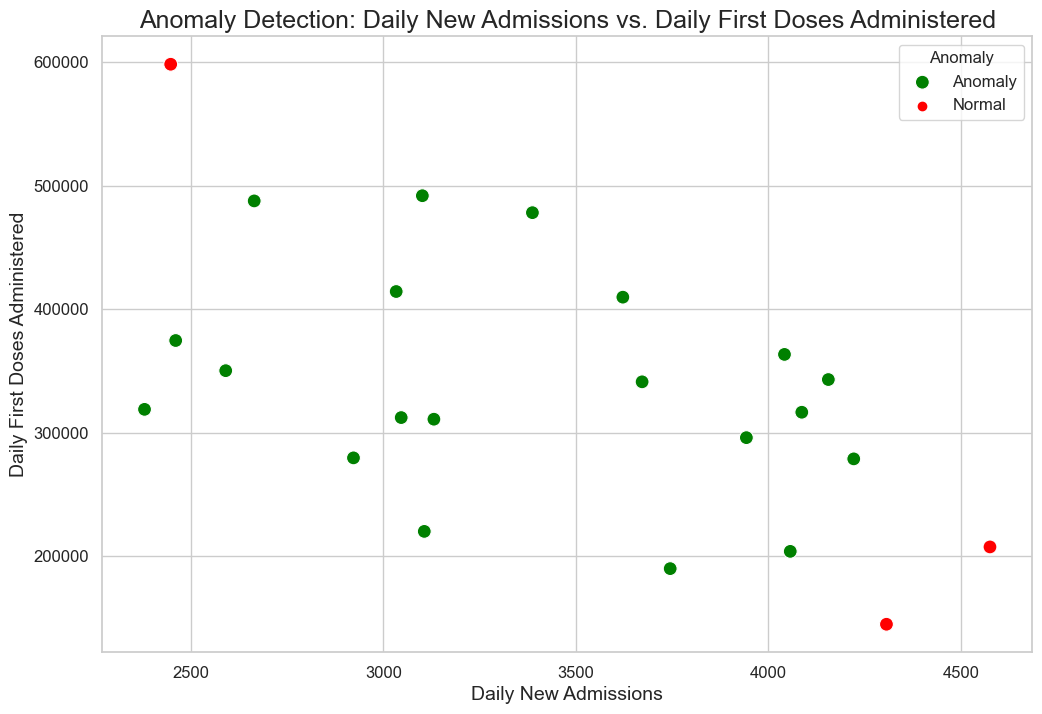

In [60]:
# Select columns from the DataFrame and rename them
anomaly_data = filtered_merged_df[['newAdmissions', 'newPeopleVaccinatedFirstDoseByPublishDate']]
anomaly_data.columns = ['new_admissions', 'daily_first_doses']

# Apply the Isolation Forest algorithm for anomaly detection
iso_forest = IsolationForest(contamination=0.1)  # Assuming that 10% of the data points are anomalies
iso_forest.fit(anomaly_data)
anomaly_labels = iso_forest.predict(anomaly_data)

# Add the anomaly labels to the original dataset
filtered_merged_df['anomaly'] = anomaly_labels

# Plot the results using a scatter plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.scatterplot(data=filtered_merged_df, x='newAdmissions', y='newPeopleVaccinatedFirstDoseByPublishDate', hue='anomaly', palette=['red', 'green'], legend='brief', s=100)

# Legend stuff needs doing 4/12/2023
plt.legend(title='Anomaly', loc='upper right', labels=['Anomaly', 'Normal'], fontsize=12)
plt.title('Anomaly Detection: Daily New Admissions vs. Daily First Doses Administered', fontsize=18)
plt.xlabel('Daily New Admissions', fontsize=14)
plt.ylabel('Daily First Doses Administered', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Print the information about the anomalies and their dates
anomalies = filtered_merged_df[filtered_merged_df['anomaly'] == -1]
print(anomalies[['date', 'newAdmissions', 'newPeopleVaccinatedFirstDoseByPublishDate']])
print(f"Number of anomalies: {len(anomalies)}")
# Find out why the anomalies are occurring
print(anomalies['month'].value_counts())
# Mean of the anomalies in comparison to the mean of the whole data set
print(anomalies['newAdmissions'].mean())
print(filtered_merged_df['newAdmissions'].mean())


# Show the plot
plt.show()


The dataset contains new admissions and first-dose vaccinations data, with three anomalies identified in January 2021. These anomalies may reflect the initial stages of the vaccination campaign and fluctuations in the virus's spread.

- 2021-01-30: Lower admissions (2,447) and higher vaccinations (598,389) might indicate improved vaccine distribution.
- 2021-01-12: High admissions (4,576) and lower vaccinations (207,661) suggest the early phase of the vaccination campaign had a limited impact on admissions.
- 2021-01-11: Similar to January 12th, high admissions (4,307) and even lower vaccinations (145,076) reinforce the idea that vaccination efforts were still ramping up.

The average new admissions for these anomalies (3,776.67) is higher than the overall average (3,421.52), possibly due to data fluctuations or the vaccination campaign's initial stages. The Isolation Forest algorithm was chosen for anomaly detection in this small dataset because it is an efficient, unsupervised learning method that can effectively handle noisy data and is applicable to various data distributions, making it well-suited for this analysis.

03:19:21 - cmdstanpy - INFO - Chain [1] start processing
03:19:21 - cmdstanpy - INFO - Chain [1] done processing
03:19:21 - cmdstanpy - INFO - Chain [1] start processing
03:19:21 - cmdstanpy - INFO - Chain [1] done processing


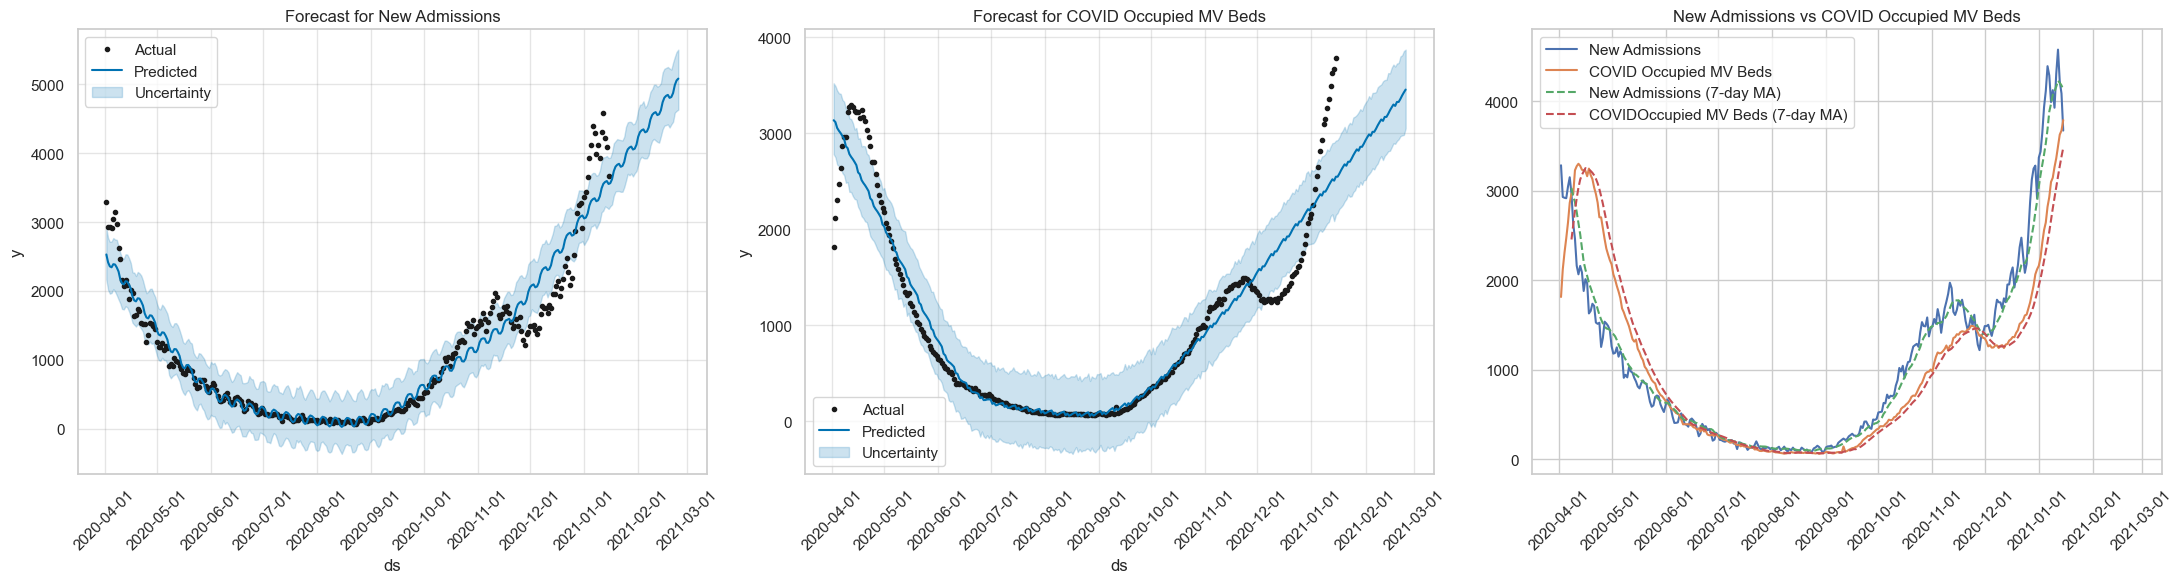

            ds         yhat   yhat_lower   yhat_upper
0   2020-04-02  3137.140914  2782.852508  3522.167780
1   2020-04-03  3117.305489  2750.975438  3494.095317
2   2020-04-04  3056.457899  2675.583170  3446.191889
3   2020-04-05  3026.979919  2659.547762  3418.046360
4   2020-04-06  3002.145564  2649.332899  3412.493187
..         ...          ...          ...          ...
324 2021-02-20  3327.717509  2938.723513  3733.791327
325 2021-02-21  3359.334723  2971.063381  3802.139547
326 2021-02-22  3395.595562  2979.238526  3814.627969
327 2021-02-23  3427.404903  2984.532257  3858.260649
328 2021-02-24  3456.687288  3052.850391  3873.287680

[329 rows x 4 columns]
Mean Squared Error for New Admissions: 87713.23706980006
Mean Squared Error for COVID-occupied MV Beds: 88765.73120009585


In [61]:

# Read the data from CSV files
new_admissions_data = pd.read_csv('PatientNewAdmissions.csv')
mv_beds_data = pd.read_csv('PatientsMVBeds.csv')

# Merge the two DataFrames based on the "date" column
merged_data = pd.merge(new_admissions_data, mv_beds_data, on="date")

# Convert the date column to datetime format
merged_data["date"] = pd.to_datetime(merged_data["date"], dayfirst=True)

# Sort the DataFrame by date
merged_data = merged_data.sort_values("date")

# Prepare the data for the Prophet model
new_admissions_prophet_data = merged_data[['date', 'newAdmissions']].rename(columns={'date': 'ds', 'newAdmissions': 'y'})
mv_beds_prophet_data = merged_data[['date', 'covidOccupiedMVBeds']].rename(columns={'date': 'ds', 'covidOccupiedMVBeds': 'y'})

# Create and fit the Prophet model for new admissions and COVID occupied MV beds
new_admissions_model = Prophet()
mv_beds_model = Prophet()
new_admissions_model.fit(new_admissions_prophet_data)
mv_beds_model.fit(mv_beds_prophet_data)

# Make predictions
new_admissions_future = new_admissions_model.make_future_dataframe(periods=40)  # Predict for the next 40 days
mv_beds_future = mv_beds_model.make_future_dataframe(periods=40)
new_admissions_forecast = new_admissions_model.predict(new_admissions_future)
mv_beds_forecast = mv_beds_model.predict(mv_beds_future)

# Create subplots
fig, (new_admissions_ax, mv_beds_ax, combined_ax) = plt.subplots(nrows=1, ncols=3, figsize=(22, 6), sharex=True)

# Plot the forecasts for new admissions
new_admissions_model.plot(new_admissions_forecast, ax=new_admissions_ax)
new_admissions_ax.set_title("Forecast for New Admissions")
new_admissions_ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
new_admissions_ax.legend(["Actual", "Predicted","Uncertainty"])
plt.setp(new_admissions_ax.get_xticklabels(), rotation=45)

# Plot the forecasts for COVID occupied MV beds
mv_beds_model.plot(mv_beds_forecast, ax=mv_beds_ax)
mv_beds_ax.set_title("Forecast for COVID Occupied MV Beds")
mv_beds_ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
mv_beds_ax.legend(["Actual", "Predicted","Uncertainty"])
plt.setp(mv_beds_ax.get_xticklabels(), rotation=45)

# Calculate the 7-day moving average
merged_data['new_admissions_ma'] = merged_data['newAdmissions'].rolling(window=7).mean()
merged_data['mv_beds_ma'] = merged_data['covidOccupiedMVBeds'].rolling(window=7).mean()

# Plot the line graph for new admissions, COVID occupied MV beds, and their moving averages
combined_ax.plot(merged_data["date"], merged_data["newAdmissions"], label="New Admissions")
combined_ax.plot(merged_data["date"], merged_data["covidOccupiedMVBeds"], label="COVID Occupied MV Beds")
combined_ax.plot(merged_data["date"], merged_data["new_admissions_ma"], label="New Admissions (7-day MA)", linestyle='--')
combined_ax.plot(merged_data["date"], merged_data["mv_beds_ma"], label="COVIDOccupied MV Beds (7-day MA)", linestyle='--')
combined_ax.set_title("New Admissions vs COVID Occupied MV Beds")
combined_ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
combined_ax.legend()
plt.setp(combined_ax.get_xticklabels(), rotation=45)

#Display the subplots
plt.tight_layout()
plt.show()

# print the forecast all the way to the end of the year
print(mv_beds_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
# Create a file with the forecast
mv_beds_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('mv_beds_forecast.csv', index=False)

# Calculate the mean squared error for new admissions
new_admissions_actual = new_admissions_prophet_data['y']
new_admissions_predicted = new_admissions_forecast.iloc[:len(new_admissions_actual)]['yhat']
new_admissions_mse = mean_squared_error(new_admissions_actual, new_admissions_predicted)
print(f"Mean Squared Error for New Admissions: {new_admissions_mse}")

# Calculate the mean squared error for COVID-occupied MV beds
mv_beds_actual = mv_beds_prophet_data['y']
mv_beds_predicted = mv_beds_forecast.iloc[:len(mv_beds_actual)]['yhat']
mv_beds_mse = mean_squared_error(mv_beds_actual, mv_beds_predicted)
print(f"Mean Squared Error for COVID-occupied MV Beds: {mv_beds_mse}")


The fluctuations in the data suggest that the COVID-19 situation was not stable during this time, with variations in case numbers or other related metrics. The range between 'yhat_lower' and 'yhat_upper' values represents the uncertainty in the predictions, which may be influenced by various factors, such as changes in testing capacity, public health interventions, or population behavior. There also is an indication of weather.

The upward trend in the data highlights the need for increased vigilance, particularly in adhering to guidelines such as social distancing, mask-wearing, and getting vaccinated when eligible. Additionally, the fluctuations in the data suggest that the situation is dynamic, and public health officials must closely monitor the data to adapt their strategies accordingly, e.g. more bed capacity. 

Mean Squared Error of New Admissions predictions: 980952.71
Mean Squared Error of COVID Occupied MV Beds predictions: 928947.68


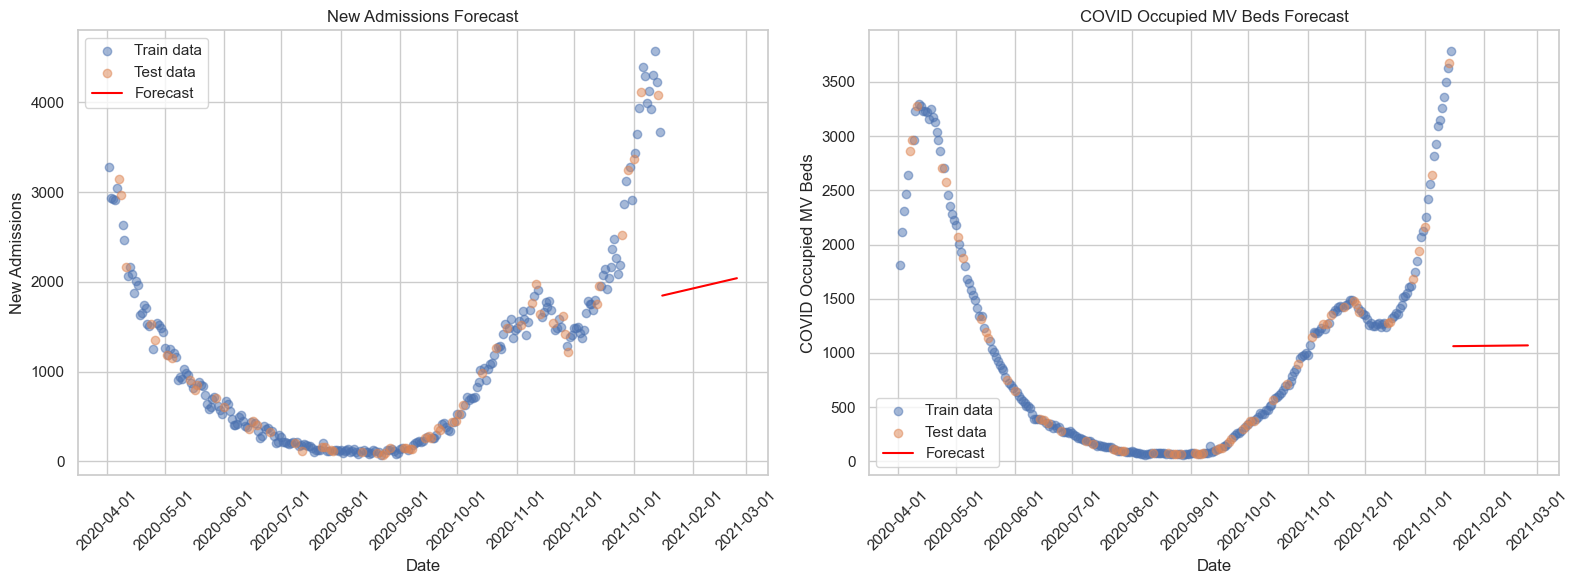

In [62]:


# Read the data from CSV files
new_admissions_data = pd.read_csv('PatientNewAdmissions.csv')
mv_beds_data = pd.read_csv('PatientsMVBeds.csv')

# Merge the two DataFrames based on the "date" column
merged_data = pd.merge(new_admissions_data, mv_beds_data, on="date")

# Convert the date column to datetime format and sort by date
merged_data["date"] = pd.to_datetime(merged_data["date"], dayfirst=True)
merged_data = merged_data.sort_values("date")

# Calculate the number of days since the start date
merged_data["days_since_start"] = (merged_data["date"] - merged_data["date"].min()).dt.days

# Split the data into train and test sets
train_data, test_data = train_test_split(merged_data, test_size=0.2, random_state=42)

# Define the features and targets for the linear regression models
X_train = train_data[["days_since_start"]]
X_test = test_data[["days_since_start"]]
y_new_admissions_train = train_data["newAdmissions"]
y_mv_beds_train = train_data["covidOccupiedMVBeds"]

# Create and fit the linear regression models
new_admissions_model = LinearRegression()
mv_beds_model = LinearRegression()
new_admissions_model.fit(X_train, y_new_admissions_train)
mv_beds_model.fit(X_train, y_mv_beds_train)

# Make predictions on the test set
y_new_admissions_pred = new_admissions_model.predict(X_test)
y_mv_beds_pred = mv_beds_model.predict(X_test)

# Calculate the mean squared error of the predictions
new_admissions_mse = mean_squared_error(test_data["newAdmissions"], y_new_admissions_pred)
mv_beds_mse = mean_squared_error(test_data["covidOccupiedMVBeds"], y_mv_beds_pred)

print(f"Mean Squared Error of New Admissions predictions: {new_admissions_mse:.2f}")
print(f"Mean Squared Error of COVID Occupied MV Beds predictions: {mv_beds_mse:.2f}")

# Make predictions for the next 40 days
next_40_days = pd.DataFrame({"days_since_start": np.arange(merged_data["days_since_start"].max() + 1, merged_data["days_since_start"].max() + 41)})
next_40_days["date"] = merged_data["date"].min() + pd.to_timedelta(next_40_days["days_since_start"], unit="D")
new_admissions_forecast = new_admissions_model.predict(next_40_days[["days_since_start"]])
mv_beds_forecast = mv_beds_model.predict(next_40_days[["days_since_start"]])

# Plot the forecasts
fig, (new_admissions_ax, mv_beds_ax) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

new_admissions_ax.scatter(train_data["date"], train_data["newAdmissions"], label="Train data", alpha=0.5)
new_admissions_ax.scatter(test_data["date"], test_data["newAdmissions"], label="Test data", alpha=0.5)
new_admissions_ax.plot(next_40_days["date"], new_admissions_forecast, label="Forecast", color="red")
new_admissions_ax.set_title("New Admissions Forecast")
new_admissions_ax.set_xlabel("Date")
new_admissions_ax.set_ylabel("New Admissions")
new_admissions_ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
new_admissions_ax.legend()
plt.setp(new_admissions_ax.get_xticklabels(), rotation=45)

mv_beds_ax.scatter(train_data["date"], train_data["covidOccupiedMVBeds"], label="Train data", alpha=0.5)
mv_beds_ax.scatter(test_data["date"], test_data["covidOccupiedMVBeds"], label="Test data", alpha=0.5)
mv_beds_ax.plot(next_40_days["date"], mv_beds_forecast, label="Forecast", color="red")
mv_beds_ax.set_title("COVID Occupied MV Beds Forecast")
mv_beds_ax.set_xlabel("Date")
mv_beds_ax.set_ylabel("COVID Occupied MV Beds")
mv_beds_ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
mv_beds_ax.legend()
plt.setp(mv_beds_ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Save the forecasts to a CSV file
forecast_data = pd.DataFrame({"date": next_40_days["date"], "new_admissions_forecast": new_admissions_forecast, "mv_beds_forecast": mv_beds_forecast})
forecast_data.to_csv("linear_regression_forecast_dates.csv", index=False)



The Prophet library and linear regression models are compared based on their mean squared error (MSE) for predicting new admissions and COVID-occupied MV beds. The results show that the Prophet library performs significantly better, with lower MSE values. However, the MSE values for both models are quite high, indicating the need for further refinement and improvement. Ideally, a well-performing model in this context should have an MSE below 20. The Prophet library is preferred due to its better handling of time-series data, including seasonality, trends, and non-linear growth, compared to the simpler linear regression model.

### Conclusion

In conclusion, the analysis of Dr. Harry Yu's provided datasets has revealed important correlations between new patient admissions, hospitalizations, and daily vaccinations. Understanding these relationships is crucial for making informed decisions in healthcare resource allocation, vaccination strategies, and public health policies. The findings suggest that increased vaccination rates correspond with decreased admissions and hospitalizations, emphasizing the importance of prioritizing vaccination campaigns. By utilizing these insights, healthcare professionals and policymakers can optimize resource distribution, improve public health outcomes, and efficiently manage future health crises.

### References
- Who.int. (2023). WHO Coronavirus (COVID-19) Dashboard. [online] Available at: https://covid19.who.int/ [Accessed 24 Apr. 2023].
- The King’s Fund. (2023). The King’s Fund. [online] Available at: https://www.kingsfund.org.uk/projects/nhs-in-a-nutshell/hospital-beds [Accessed 24 Apr. 2023].
- The Health Foundation. (2020). COVID-19 policy tracker 2020. [online] Available at: https://www.health.org.uk/news-and-comment/charts-and-infographics/covid-19-policy-tracker?gclid=CjwKCAjwrpOiBhBVEiwA_473dKHom9DTIV2eMPdGxWWtcuj4wJoBCDNE40ki6r_5SqLvPAdfxwmzixoCE_0QAvD_BwE [Accessed 24 Apr. 2023].
Institute for Government. (2021). 
- Coronavirus vaccine rollout | Institute for Government. [online] Available at: https://www.instituteforgovernment.org.uk/article/explainer/coronavirus-vaccine-rollout [Accessed 24 Apr. 2023].

‌


